# Part II - (Analysis of User Behavior)
## by (Huda Armoush)

## Investigation Overview


>The dataset represents bike-sharing trips, containing detailed trip information such as trip duration, start and end stations, user type, gender, and trip timings. It provides insights into bike-sharing user behavior, temporal patterns, and demographic trends. The dataset includes the following features:

>Trip Details: duration_sec, start_station, end_station, start_time, end_time, etc.
User Information: user_type, member_gender, member_birth_year, member_age

Goal: 
- Explore patterns in trip duration, start times, and user demographics in the Ford GoBike System.
Key Insights:
* Differences between subscriber and customer behavior.
* Age and gender distribution among users.
* Peak usage hours and trip duration patterns.
## Dataset Overview and Executive Summary

> Briefly introduce your dataset here. Include a summary of findings that your visualizations will support.

> **Rubric Tip**: The key insights can be in a bulleted or numbered list for ease of review.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [6]:
# load in the dataset into a pandas dataframe

df = pd.read_csv("cleaned_Ford.csv")


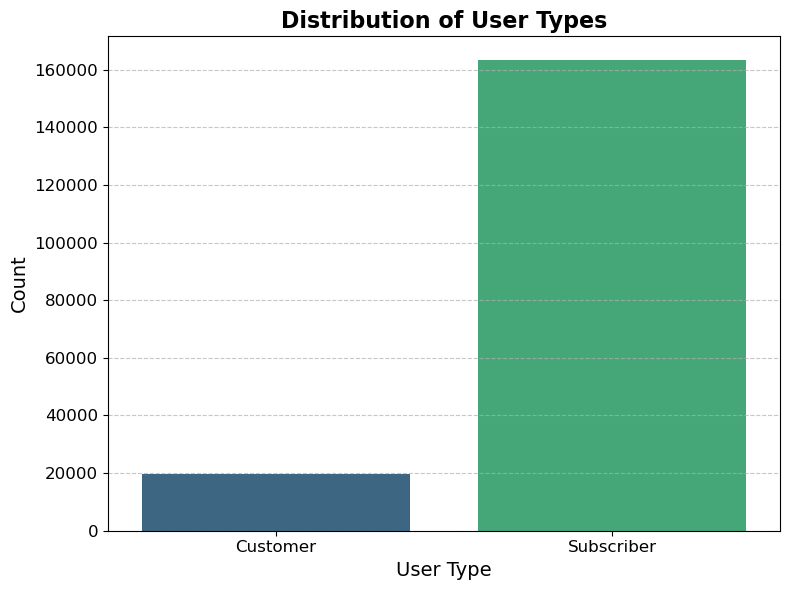

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='user_type', palette='viridis') 

# Titles and labels
plt.title("Distribution of User Types", fontsize=16, weight='bold')
plt.xlabel("User Type", fontsize=14)
plt.ylabel("Count", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

This count plot provides a clear overview of the distribution of different user types in the dataset. The user_type variable is visualized, with subscribers and customers being the two main categories. By observing the plot, it's evident that subscribers represent the majority of users, indicating a strong preference for the service among regular users, likely for commuting purposes. In contrast, customers represent a smaller proportion, which may suggest casual or occasional usage of the bike-sharing service.

# Trip Duration by User Type

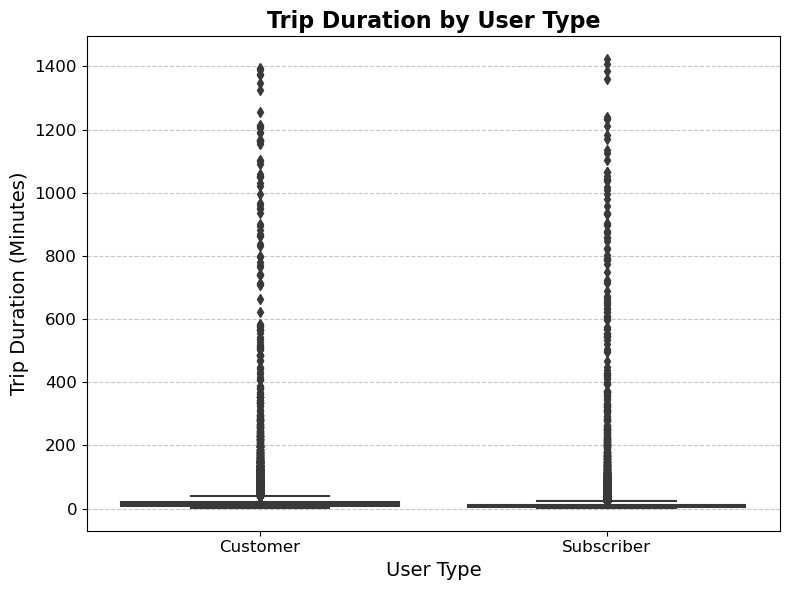

In [16]:
# Plot 2: Trip Duration by User Type
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='user_type', y='trip_duration_minutes', palette='viridis')
plt.title("Trip Duration by User Type", fontsize=16, weight='bold')
plt.xlabel("User Type", fontsize=14)
plt.ylabel("Trip Duration (Minutes)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


This plot shows that customers typically have longer trip durations than subscribers, highlighting different usage patterns between the two user groups.

## (Visualization 3: Hourly Distribution of Trips)


In [22]:
df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour


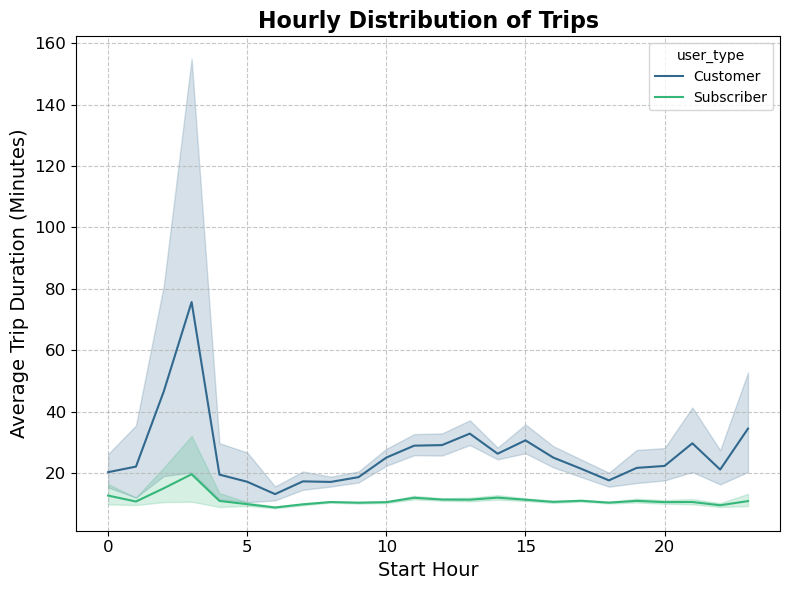

In [24]:
# Plot 3: Hourly Distribution of Trips
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='start_hour', y='trip_duration_minutes', hue='user_type', palette='viridis')
plt.title("Hourly Distribution of Trips", fontsize=16, weight='bold')
plt.xlabel("Start Hour", fontsize=14)
plt.ylabel("Average Trip Duration (Minutes)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Observation



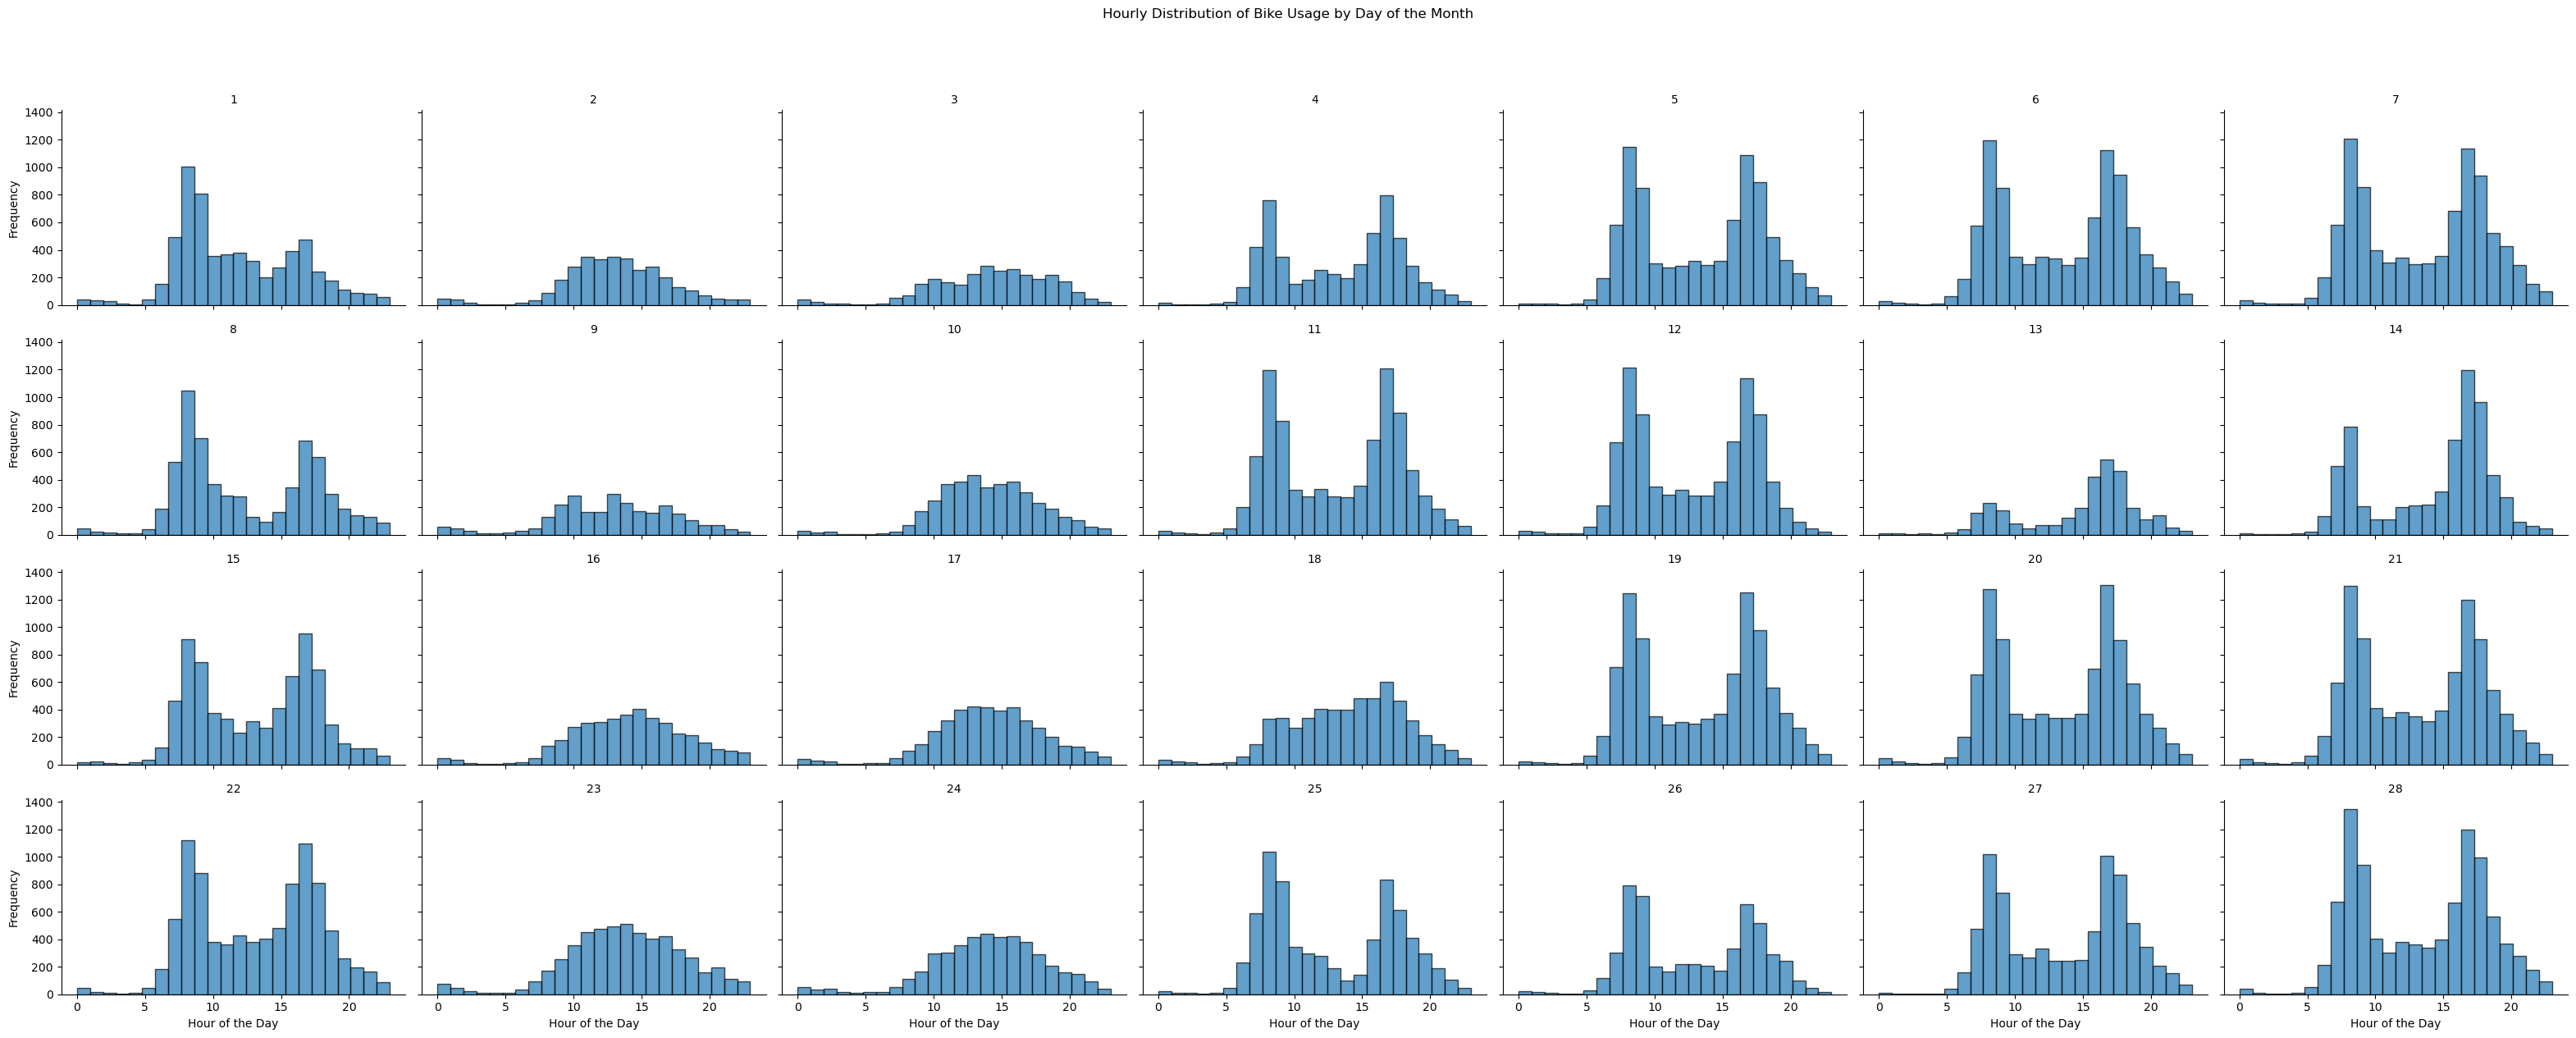

In [30]:
if 'start_hour' not in df.columns:
    df['start_hour'] = pd.to_datetime(df['start_time']).dt.hour

if 'day' not in df.columns:
    df['day'] = pd.to_datetime(df['start_time']).dt.day

# Create the FacetGrid with better aesthetics
g = sns.FacetGrid(data=df, col="day", col_wrap=7, height=3, aspect=1.5, palette="viridis")

# Map the histogram to the grid
g.map(plt.hist, "start_hour", bins=24, edgecolor='black', alpha=0.7)

# Add titles and labels
g.set_titles("{col_name}")
g.set_axis_labels("Hour of the Day", "Frequency")
g.fig.suptitle("Hourly Distribution of Bike Usage by Day of the Month", y=1.05)

# Adjust the layout
g.tight_layout()

# Show the plot
plt.show()

# Observation 